# Import data

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats

# Read in Data

In [207]:
data_path = os.path.join('..', 'data', 'raw', 'pizza_data.csv')
pizza_data = pd.read_csv(data_path)

In [208]:
# View data
pizza_data.head()

,cust_id,condition,order_conv,num_item,order_total,session_duration
0,1,0,1,9,8.59,1.72
1,2,0,0,0,0.00,9.44
2,3,1,1,7,11.97,2.39
3,4,0,0,0,0.00,1.29
4,5,0,0,0,0.00,5.23


In [209]:
# Check data types
pizza_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cust_id           4000 non-null   int64  
 1   condition         4000 non-null   int64  
 2   order_conv        4000 non-null   int64  
 3   num_item          4000 non-null   int64  
 4   order_total       4000 non-null   float64
 5   session_duration  4000 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 187.6 KB


In [210]:
# Update order_conv and condition to categorical variable
pizza_data[['order_conv', 'condition']] = pizza_data[['order_conv', 'condition']].astype('category')

In [211]:
# Confirm datatype updates
pizza_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   cust_id           4000 non-null   int64   
 1   condition         4000 non-null   category
 2   order_conv        4000 non-null   category
 3   num_item          4000 non-null   int64   
 4   order_total       4000 non-null   float64 
 5   session_duration  4000 non-null   float64 
dtypes: category(2), float64(2), int64(2)
memory usage: 133.2 KB


# Outcome Variable

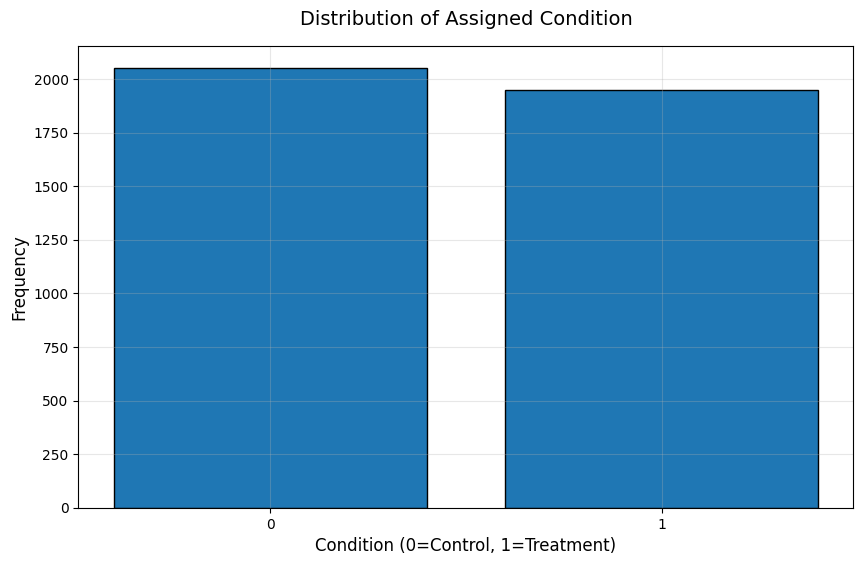

In [212]:
# Confirm 50/50 split
plt.figure(figsize=(10, 6))
plt.bar(['0', '1'], 
        pizza_data['condition'].value_counts().sort_index(),
        edgecolor='black')
plt.title('Distribution of Assigned Condition', fontsize=14, pad=15)
plt.xlabel('Condition (0=Control, 1=Treatment)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, alpha=0.3)

# Numerical Features

In [213]:
# Run loop to see all numerical features by outcome
def plot_numerical_by_condition(data, numeric_cols):
    
    # Loop through each numerical column
    for col in numeric_cols:
        # Create figure
        plt.figure(figsize=(12, 6))
        
        # Create histogram for each condition
        plt.hist([
            data[data['condition'] == 0][col],
            data[data['condition'] == 1][col]
        ],
            label=['Control (0)', 'Treatment (1)'],
            bins=50,
            alpha=0.7,
            edgecolor='black')
        
        # Add labels and title
        plt.title(f'Distribution of {col} by Condition', fontsize=14, pad=15)
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # Add summary statistics
        for condition in [0, 1]:
            stats = data[data['condition'] == condition][col].describe()
            stats_text = (
                f'Condition {condition}:\n'
                f'n: {stats["count"]:.0f}\n'
                f'Mean: ${stats["mean"]:.2f}\n'
                f'Median: ${stats["50%"]:.2f}\n'
                f'Std: ${stats["std"]:.2f}'
            )
            plt.text(0.95 if condition else 0.05, 0.95,
                    stats_text,
                    transform=plt.gca().transAxes,
                    verticalalignment='top',
                    horizontalalignment='right' if condition else 'left',
                    bbox=dict(boxstyle='round',
                             facecolor='white',
                             alpha=0.8))
        
        plt.tight_layout()
        plt.show()

        from scipy import stats
        # Print t-test results
        t_stat, p_val = stats.ttest_ind(
            data[data['condition'] == 0][col],
            data[data['condition'] == 1][col]
        )
        print(f"\nT-test results for {col}:")
        print(f"t-statistic: {t_stat:.4f}")
        print(f"p-value: {p_val:.4f}")
        print("-" * 50)

## Number of Items

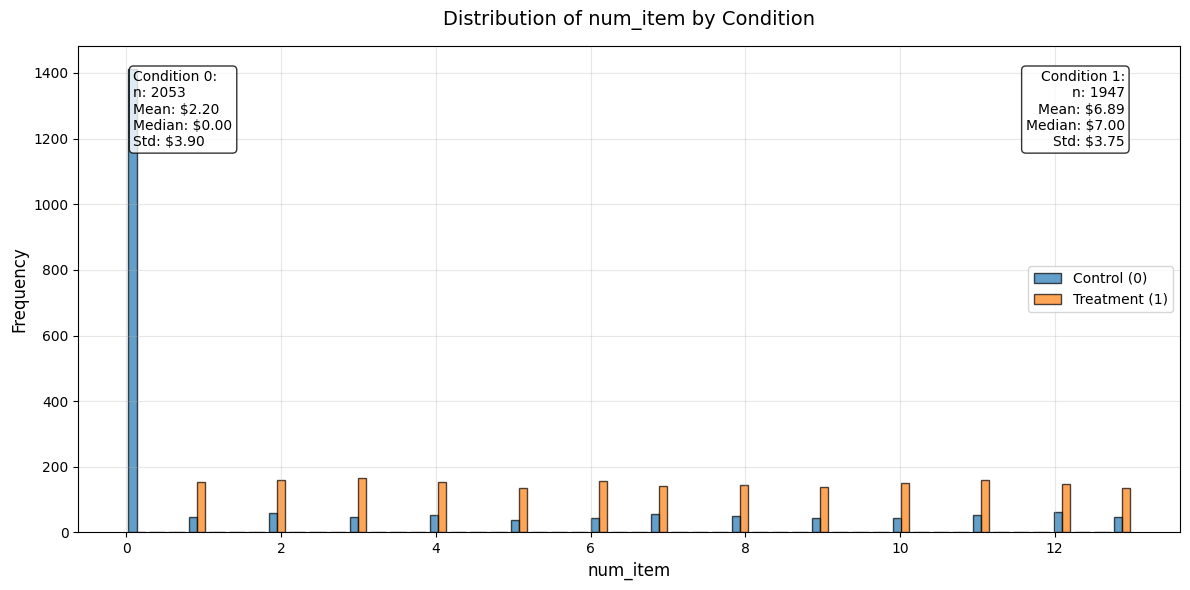


T-test results for num_item:
t-statistic: -38.7022
p-value: 0.0000
--------------------------------------------------


In [214]:
numeric_columns = ["num_item"]
plot_numerical_by_condition(pizza_data, numeric_columns)

## Order Total

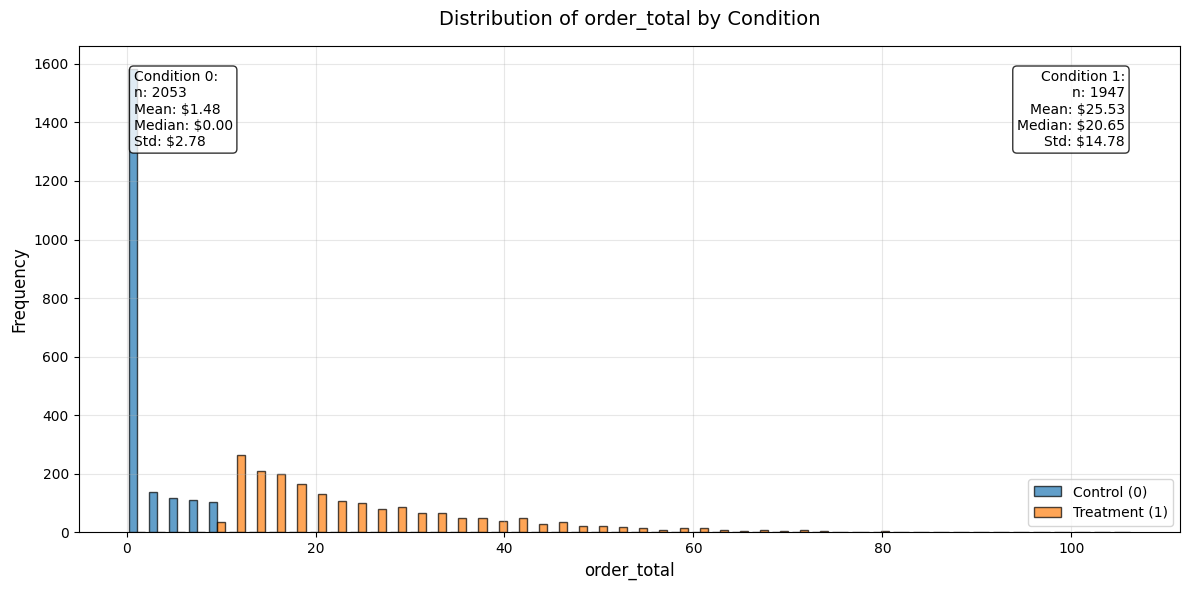


T-test results for order_total:
t-statistic: -72.3632
p-value: 0.0000
--------------------------------------------------


In [215]:
numeric_columns = ["order_total"]
plot_numerical_by_condition(pizza_data, numeric_columns)

## Site Navigation Time

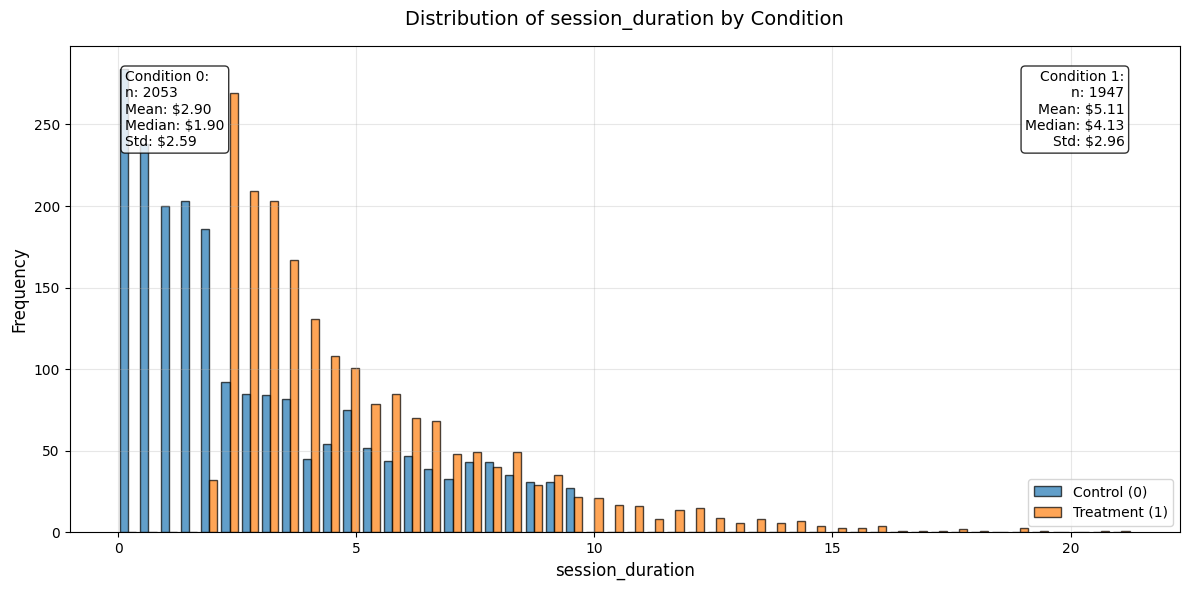


T-test results for session_duration:
t-statistic: -25.1409
p-value: 0.0000
--------------------------------------------------


In [216]:
numeric_columns = ["session_duration"]
plot_numerical_by_condition(pizza_data, numeric_columns)

# Categorical Features

In [217]:
pd.crosstab(pizza_data['condition'], pizza_data['order_conv'])

order_conv,0,1
condition,,
0,1412,641
1,0,1947


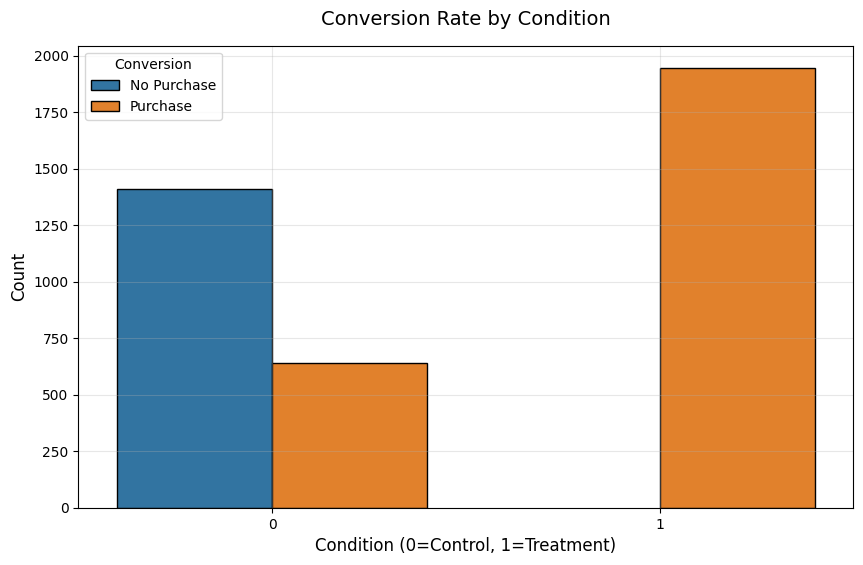

In [218]:
# Site condition by order status
plt.figure(figsize=(10, 6))
sns.countplot(data=pizza_data, 
              x='condition', 
              hue='order_conv',
              edgecolor='black')

plt.title('Conversion Rate by Condition', fontsize=14, pad=15)
plt.xlabel('Condition (0=Control, 1=Treatment)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Conversion', labels=['No Purchase', 'Purchase'])
plt.grid(True, alpha=0.3)
plt.show()